In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("data/housing_data.csv")

In [3]:
data.head()

,Bedrooms,SquareFeet,Bathrooms,Garage,SwimmingPool,Price
0,2,1000,1,1,0,200000
1,3,1500,2,1,0,300000
2,2,1200,1,0,0,220000
3,4,2000,3,1,1,400000
4,3,1800,2,1,0,350000


### X and Y axis

In [4]:
X = data.drop(['Price'], axis=1) #features
Y = data['Price']                #results

In [5]:
print(X)

    Bedrooms  SquareFeet  Bathrooms  Garage  SwimmingPool
0          2        1000          1       1             0
1          3        1500          2       1             0
2          2        1200          1       0             0
3          4        2000          3       1             1
4          3        1800          2       1             0
5          5        2500          4       2             1
6          2         900          1       0             0
7          3        1200          2       1             0
8          4        1800          3       1             0
9          2        1500          1       1             0
10         3        2000          2       1             1
11         5        3000          4       2             1
12         2        1100          1       0             0
13         3        1400          2       1             0
14         4        2200          3       1             1
15         2        1300          1       1             0
16         3  

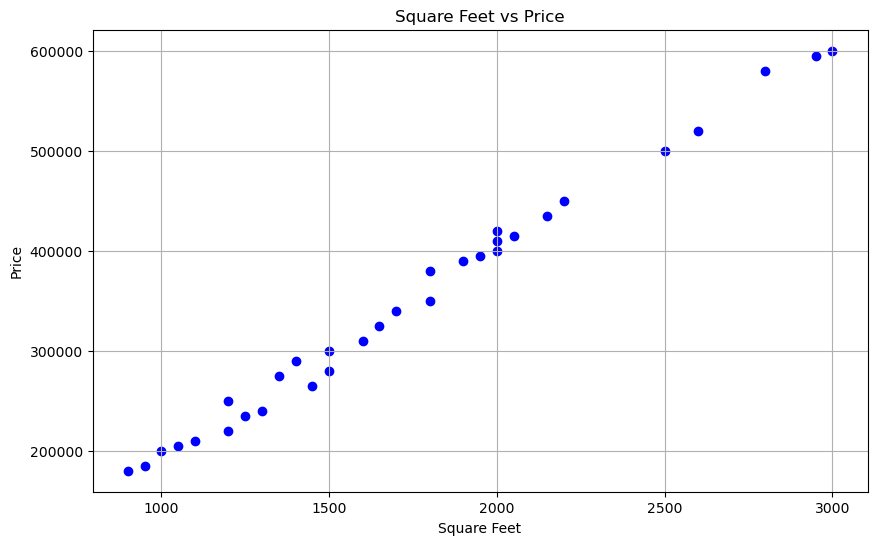

In [6]:
# Scatter plot for SquareFeet vs Price
plt.figure(figsize=(10, 6))
plt.scatter(data['SquareFeet'], data['Price'], color='blue')
plt.title('Square Feet vs Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Split data into training and testing data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state = 42)

## Create linear Regression object and fit the data

In [8]:
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## make the prediction and evaluate the problem

In [9]:
y_pred = model.predict(x_test)

## Function to predict the price

In [10]:
def predict_price(bedrooms, square_feet, bathrooms, garage, swimmingpool):
    input_data= pd.DataFrame([[bedrooms,square_feet,bathrooms, garage, swimmingpool]], columns = ['Bedrooms', 'SquareFeet', 'Bathrooms', 'Garage', 'SwimmingPool'])
    predicted_price = model.predict(input_data)
    return predicted_price[0]
bedrooms = input("Enter the number of bedrooms")
square_feet = input("Enter the price of houses")
bathrooms = input("How many bathrooms you have, No")
garage = input("Do you have garage? if Yes write: 1 and if Not write: 0")
swimmingpool = input("Do you have Swimming Pool? if Yes write: 1 and if Not write: 0")
predicted_price = predict_price(bedrooms, square_feet, bathrooms, garage,swimmingpool)
print(f'The predicted price for a house with {bedrooms} bedrooms, area of {square_feet} square feet, {bathrooms} bathrooms, Number of {garage} garage and {swimmingpool} swimmingpool is ${predicted_price:.2f}')    

The predicted price for a house with 5 bedrooms, area of 2000 square feet, 2 bathrooms, Number of 1 garage and 1 swimmingpool is $413220.59


## Print the coefficient 

In [11]:
print("Intercept ", model.intercept_)
print("Coefficient ", model.coef_[0])

Intercept  -2497.1502692478243
Coefficient  6844.463661019588


## predicted value y-pred

In [12]:
print('prediction value', y_pred[0])


prediction value 325393.0663102867


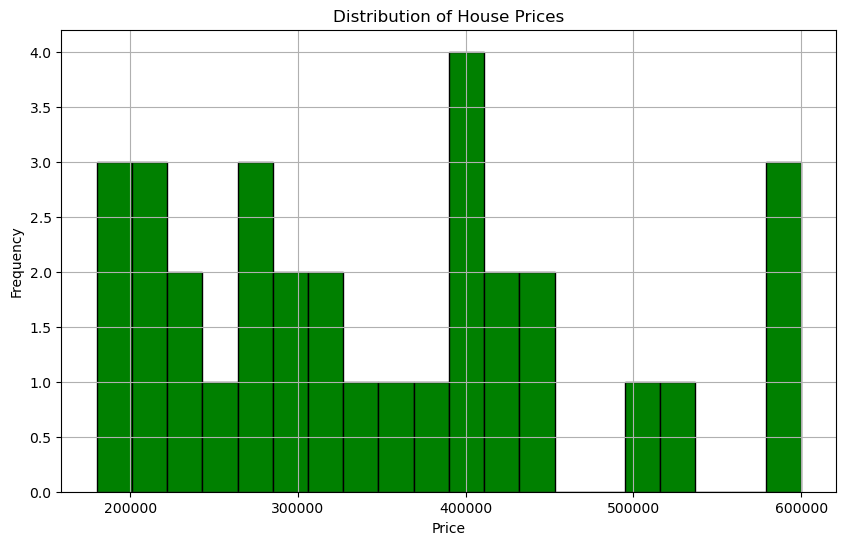

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

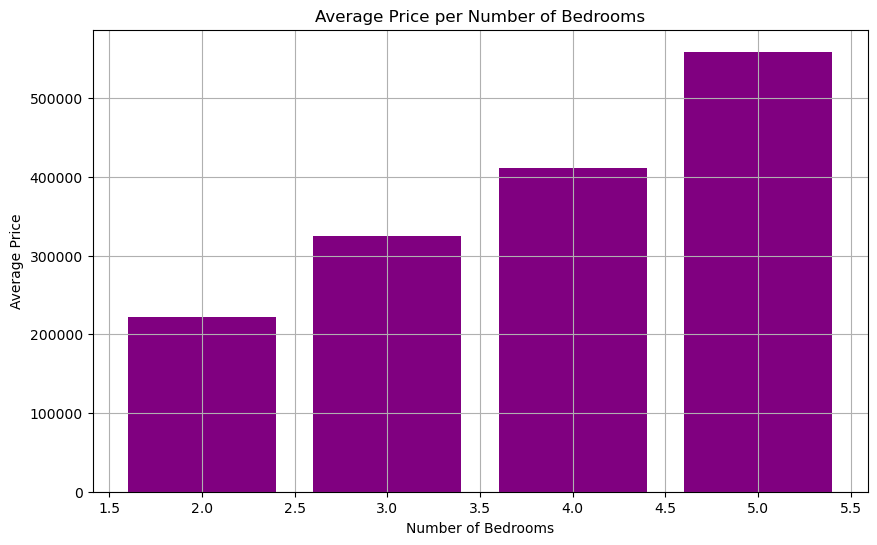

In [14]:
avg_price_per_bedroom = data.groupby('Bedrooms')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_bedroom['Bedrooms'], avg_price_per_bedroom['Price'], color='purple')
plt.title('Average Price per Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()